# FS Index Analysis

In [1]:
import pandas as pd
import numpy as np

## Load the fs index dataframe


In [2]:
df = pd.read_csv('../data/fs_index.csv', low_memory=False)

In [3]:
df.info()
display(df.describe())
display(df.head())
display(df.iloc[123].T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15714050 entries, 0 to 15714049
Data columns (total 20 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   path            object
 1   name            object
 2   stem            object
 3   suffix          object
 4   parent          object
 5   size            int64 
 6   mode            int64 
 7   type            object
 8   perm            int64 
 9   uid             int64 
 10  gid             int64 
 11  nlink           int64 
 12  inode           int64 
 13  is_symlink      bool  
 14  is_hardlink     bool  
 15  symlink_target  object
 16  created_at      object
 17  modified_at     object
 18  accessed_at     object
 19  device          int64 
dtypes: bool(2), int64(8), object(10)
memory usage: 2.1+ GB


,size,mode,perm,uid,gid,nlink,inode,device
count,1.571405e+07,1.571405e+07,1.571405e+07,1.571405e+07,1.571405e+07,1.571405e+07,1.571405e+07,1.571405e+07
mean,1.822634e+07,3.320620e+04,6.712549e+02,3.415693e+02,3.417007e+02,1.452324e+01,5.264705e+07,4.551125e+03
std,5.020893e+10,4.758651e+01,7.384270e+01,4.710734e+02,4.711138e+02,8.865696e+00,3.887052e+08,1.265804e+04
min,0.000000e+00,3.276800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
25%,5.370000e+02,3.318800e+04,6.440000e+02,0.000000e+00,0.000000e+00,6.000000e+00,5.001820e+06,2.050000e+03
50%,1.719000e+03,3.318800e+04,6.440000e+02,0.000000e+00,0.000000e+00,2.100000e+01,6.453216e+06,2.050000e+03
75%,7.090000e+03,3.326100e+04,7.550000e+02,1.000000e+03,1.000000e+03,2.100000e+01,2.324406e+07,2.050000e+03
max,1.407375e+14,3.633300e+04,6.755000e+03,1.001000e+03,1.000000e+03,2.800000e+01,4.026534e+09,6.630800e+04


,path,name,stem,suffix,parent,size,mode,type,perm,uid,gid,nlink,inode,is_symlink,is_hardlink,symlink_target,created_at,modified_at,accessed_at,device
0,/swapfile,swapfile,swapfile,NaN,/,68719476736,33152,file,600,0,0,1,17,False,False,NaN,2025-09-06 01:14:48.705166817,2025-09-06 01:14:48.705166817,2025-10-17 11:10:07.221233845,66308
1,/media/.directory,.directory,.directory,NaN,/media,36,33188,file,644,0,0,1,19400551,True,False,/etc/kubuntu-default-settings/directory-media,2025-09-03 11:56:15.043567657,2024-11-21 18:51:01.000000000,2025-10-17 21:06:31.291021347,66308
2,/media/.hidden,.hidden,.hidden,NaN,/media,12,33188,file,644,0,0,1,19400552,True,False,/etc/kubuntu-default-settings/hidden-media,2025-09-03 11:56:15.043629885,2024-11-21 18:51:01.000000000,2025-10-07 19:54:26.809445858,66308
3,/dev/core,core,core,NaN,/dev,140737471598592,33024,file,400,0,0,1,4026532030,True,False,/proc/kcore,2025-10-17 19:37:34.359894276,2025-10-17 19:37:34.359894276,2025-10-17 19:37:34.359894276,25
4,/proc/fb,fb,fb,NaN,/proc,0,33060,file,444,0,0,1,4026531998,False,False,NaN,2025-10-18 12:00:20.508089781,2025-10-18 12:00:20.508089781,2025-10-18 12:00:20.508089781,25


path                         /etc/nftables.conf
name                              nftables.conf
stem                                   nftables
suffix                                    .conf
parent                                     /etc
size                                        243
mode                                      33261
type                                       file
perm                                        755
uid                                           0
gid                                           0
nlink                                         1
inode                                  19399170
is_symlink                                False
is_hardlink                               False
symlink_target                              NaN
created_at        2025-09-03 11:56:14.851215124
modified_at       2024-10-04 09:10:58.000000000
accessed_at       2025-10-05 21:45:13.373115540
device                                    66308
Name: 123, dtype: object

## `parent`

In [4]:
df['parent'].unique()

array(['/', '/media', '/dev', ...,
       '/sys/kernel/mm/hugepages/hugepages-2048kB',
       '/sys/kernel/mm/hugepages/hugepages-1048576kB',
       '/sys/kernel/mm/mempolicy/weighted_interleave'],
      shape=(1309234,), dtype=object)

In [5]:
mask = df['parent'] == '/mnt/Data/obsidian/clippings_vault/Clippings'
df[mask]

,path,name,stem,suffix,parent,size,mode,type,perm,uid,gid,nlink,inode,is_symlink,is_hardlink,symlink_target,created_at,modified_at,accessed_at,device
478239,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250509_134134_Man (28) die minstens 33 meisj...,20250509_134134_Man (28) die minstens 33 meisj...,.md,/mnt/Data/obsidian/clippings_vault/Clippings,10543,33256,file,750,1000,1000,1,4855057,False,False,NaN,2025-09-21 20:55:20.150953293,2025-05-09 11:41:37.080766916,2025-09-28 18:04:52.890472889,2065
478240,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250812_212603_AI-startup brengt ongevraagd b...,20250812_212603_AI-startup brengt ongevraagd b...,.md,/mnt/Data/obsidian/clippings_vault/Clippings,3443,33256,file,750,1000,1000,1,4856596,False,False,NaN,2025-09-21 20:55:20.152953148,2025-08-12 19:26:06.365535021,2025-09-28 18:04:56.126436234,2065
478241,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250622_220427_Donald Trump sleurt VS mee in ...,20250622_220427_Donald Trump sleurt VS mee in ...,.md,/mnt/Data/obsidian/clippings_vault/Clippings,5502,33256,file,750,1000,1000,1,4856119,False,False,NaN,2025-09-21 20:55:20.153953314,2025-06-22 20:04:30.393210888,2025-09-28 18:04:55.015448809,2065
478242,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20251002_151039_‘Een positief neveneffect van ...,20251002_151039_‘Een positief neveneffect van ...,.md,/mnt/Data/obsidian/clippings_vault/Clippings,582,33204,file,664,1000,1000,1,4857392,False,False,NaN,2025-10-02 13:10:41.977396965,2025-10-02 13:10:41.977396965,2025-10-02 13:10:41.984396935,2065
478243,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250118_150551_Antwerpse diamantsector in his...,20250118_150551_Antwerpse diamantsector in his...,.md,/mnt/Data/obsidian/clippings_vault/Clippings,4567,33256,file,750,1000,1000,1,4851624,False,False,NaN,2025-09-21 20:55:20.162953138,2025-01-18 14:05:54.766040087,2025-09-28 18:04:29.312738419,2065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485190,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250423_001642_Thread by @CarineKnapen.md,20250423_001642_Thread by @CarineKnapen,.md,/mnt/Data/obsidian/clippings_vault/Clippings,1500,33256,file,750,1000,1000,1,4854433,False,False,NaN,2025-09-21 20:55:20.252952814,2025-04-22 22:16:46.047143698,2025-09-28 18:04:36.395658731,2065
485191,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250419_093349_VRT NWS spreekt met 2 spionnen...,20250419_093349_VRT NWS spreekt met 2 spionnen...,.md,/mnt/Data/obsidian/clippings_vault/Clippings,4363,33256,file,750,1000,1000,1,4854337,False,False,NaN,2025-09-21 20:55:20.252952814,2025-04-19 07:33:53.695365429,2025-10-06 20:30:09.751716137,2065
485192,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250306_095316_Gaf Europa meer uit aan Russis...,20250306_095316_Gaf Europa meer uit aan Russis...,.md,/mnt/Data/obsidian/clippings_vault/Clippings,12223,33256,file,750,1000,1000,1,4852702,False,False,NaN,2025-09-21 20:55:20.252952814,2025-03-06 08:53:19.316905975,2025-09-28 18:04:32.496702671,2065
485193,/mnt/Data/obsidian/clippings_vault/Clippings/2...,20250126_142803_Thread by @CarineKnapen.md,20250126_142803_Thread by @CarineKnapen,.md,/mnt/Data/obsidian/clippings_vault/Clippings,6164,33256,file,750,1000,1000,1,4851825,False,False,NaN,2025-09-21 20:55:20.252952814,2025-01-26 13:28:07.008221625,2025-09-28 18:04:29.690734148,2065


## `size`

In [6]:
df[df['size'] > 0.1e14]

,path,name,stem,suffix,parent,size,mode,type,perm,uid,gid,nlink,inode,is_symlink,is_hardlink,symlink_target,created_at,modified_at,accessed_at,device
3,/dev/core,core,core,NaN,/dev,140737471598592,33024,file,400,0,0,1,4026532030,True,False,/proc/kcore,2025-10-17 19:37:34.359894276,2025-10-17 19:37:34.359894276,2025-10-17 19:37:34.359894276,25
12,/proc/kcore,kcore,kcore,NaN,/proc,140737471598592,33024,file,400,0,0,1,4026532030,False,False,NaN,2025-10-17 19:37:34.359894276,2025-10-17 19:37:34.359894276,2025-10-17 19:37:34.359894276,25


`/dev/core` is a symlink to `/proc/kcore`. 

`/proc/kcore` is a virtual file that provides a snapshot-like view of the system’s physical memory (RAM) as if it were an ELF core dump. Its purpose is primarily for debugging the kernel.

The size seems huge (~140TiB) buit this is off cource virtual.

Text(0.5, 1.0, 'Size distribution')

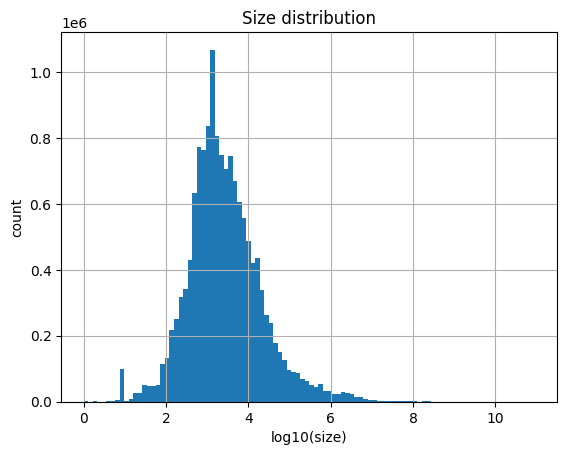

In [7]:
mask = (df['size'] <= 1e14) & (df['size'] > 0)
p = np.log10(df[mask]['size']).hist(bins=100)
p.set_xlabel('log10(size)')
p.set_ylabel('count')
p.set_title('Size distribution')


## `device`

`device` represents the device ID of the filesystem where the file resides.

In [8]:
devices = df['device'].unique()
devices.sort()
devices

array([    1,     4,     7,    13,    24,    25,    27,    28,    29,
          31,    34,    37,    46,    48,    57,  2049,  2050,  2065,
        2066, 66305, 66307, 66308])

In [12]:
 df['device'].value_counts()

device
2050     12813271
2066      1239774
66308      632757
25         478925
2065       260824
28         112257
2049        81214
24          54561
13          17206
4           14860
29           5009
46           1375
27            892
1             735
66305         131
31             84
7              82
57             74
66307           8
34              4
37              4
48              3
Name: count, dtype: int64

In [13]:
mask = df['device'] == 2050
df[mask].sample(5)

,path,name,stem,suffix,parent,size,mode,type,perm,uid,gid,nlink,inode,is_symlink,is_hardlink,symlink_target,created_at,modified_at,accessed_at,device
2197216,/mnt/Backup/backintime/AI-PC/root/1/20251017-1...,20250419_213840_Trump Officials Blame Mistake ...,20250419_213840_Trump Officials Blame Mistake ...,.md,/mnt/Backup/backintime/AI-PC/root/1/20251017-1...,9136,33256,file,750,1000,1000,20,12194290,False,True,NaN,2025-10-18 12:15:02.576165199,2025-04-19 19:38:43.663480282,2025-10-02 18:15:29.573141575,2050
10074765,/mnt/Backup/timeshift/snapshots/2025-09-26_22-...,touchTypistRevertInlineCard.common.chunk.js,touchTypistRevertInlineCard.common.chunk,.js,/mnt/Backup/timeshift/snapshots/2025-09-26_22-...,2681,33261,file,755,1000,1000,6,14559445,False,True,NaN,2025-10-08 18:00:35.044172287,2025-09-20 14:02:33.871390104,2025-10-02 18:00:26.803211689,2050
9842553,/mnt/Backup/timeshift/snapshots/2025-09-26_22-...,af_key.ko.zst,af_key.ko,.zst,/mnt/Backup/timeshift/snapshots/2025-09-26_22-...,25786,33261,file,755,0,0,6,14818256,False,True,NaN,2025-10-08 18:01:00.388896227,2025-04-06 12:36:36.000000000,2025-09-21 00:16:22.178927898,2050
5558660,/mnt/Backup/timeshift/snapshots/2025-10-16_21-...,s5pv210.h,s5pv210,.h,/mnt/Backup/timeshift/snapshots/2025-10-16_21-...,5267,33188,file,644,0,0,21,2504478,False,True,NaN,2025-10-18 12:00:56.788645983,2025-03-24 14:02:41,2025-10-02 18:09:58.786765337,2050
4785698,/mnt/Backup/timeshift/snapshots/2025-10-12_03-...,kunitconversion6.mo,kunitconversion6,.mo,/mnt/Backup/timeshift/snapshots/2025-10-12_03-...,216519,33188,file,644,0,0,21,6165464,False,True,NaN,2025-10-18 12:00:50.594721317,2025-03-18 10:55:09,2025-10-02 18:08:53.467355251,2050


In [14]:
mask = df['device'] == 2066
df[mask].sample(5)

,path,name,stem,suffix,parent,size,mode,type,perm,uid,gid,nlink,inode,is_symlink,is_hardlink,symlink_target,created_at,modified_at,accessed_at,device
1973019,/mnt/Dev/z_to_clean/1_portfolio/financial_anal...,CIK0001865883.json,CIK0001865883,.json,/mnt/Dev/z_to_clean/1_portfolio/financial_anal...,1196,33279,file,777,1000,1000,1,53992959,False,False,NaN,2025-09-14 07:28:41.719412088,2024-09-12 04:31:52,2025-09-14 00:28:13.945074320,2066
867460,/mnt/Dev/z_to_clean/Pre_Corona/My_Projects/exp...,19eeac65de53cdcb2822c36540a6b7f283c7c8,19eeac65de53cdcb2822c36540a6b7f283c7c8,NaN,/mnt/Dev/z_to_clean/Pre_Corona/My_Projects/exp...,419,33279,file,777,1000,1000,1,2759478,False,False,NaN,2025-09-14 07:28:43.047399759,2019-12-30 02:41:42.000000000,2025-09-14 02:26:35.777816534,2066
1586903,/mnt/Dev/z_to_clean/1_portfolio/financial_anal...,CIK0001998147.json,CIK0001998147,.json,/mnt/Dev/z_to_clean/1_portfolio/financial_anal...,1214,33279,file,777,1000,1000,1,54103089,False,False,NaN,2025-09-14 07:28:39.954428434,2024-09-12 04:17:17,2025-09-14 00:28:50.758893728,2066
1828171,/mnt/Dev/z_to_clean/1_portfolio/financial_anal...,CIK0001452665.json,CIK0001452665,.json,/mnt/Dev/z_to_clean/1_portfolio/financial_anal...,1200,33279,file,777,1000,1000,1,53624668,False,False,NaN,2025-09-14 07:28:41.108417749,2024-09-12 05:23:07,2025-09-14 00:25:56.212887764,2066
1056636,/mnt/Dev/z_to_clean/1_portfolio/finan/.venv/li...,__init__.cpython-312.pyc,__init__.cpython-312,.pyc,/mnt/Dev/z_to_clean/1_portfolio/finan/.venv/li...,732,33279,file,777,1000,1000,1,52982995,False,False,NaN,2025-09-14 07:28:41.978409767,2024-10-04 12:22:18.439534187,2025-09-14 00:07:20.480463028,2066


In [15]:
mask = df['device'] == 66308
df[mask].sample(5)

,path,name,stem,suffix,parent,size,mode,type,perm,uid,gid,nlink,inode,is_symlink,is_hardlink,symlink_target,created_at,modified_at,accessed_at,device
293524,/home/md/.cursor/extensions/anysphere.cursorpy...,context.pyi,context,.pyi,/home/md/.cursor/extensions/anysphere.cursorpy...,4312,33188,file,644,1000,1000,1,28456216,False,False,NaN,2025-09-18 21:24:52.766095400,2025-09-18 21:24:52.766095400,2025-09-20 21:57:57.700769663,66308
14945412,/var/www/nextcloud/apps/text/js/chunk-OMD6QJNC...,chunk-OMD6QJNC-l15pcmRo.chunk.mjs.map,chunk-OMD6QJNC-l15pcmRo.chunk.mjs,.map,/var/www/nextcloud/apps/text/js,5785,33188,file,644,33,33,1,28186389,False,False,NaN,2025-09-25 22:50:22.780982971,2025-09-11 13:04:38,2025-09-25 22:58:54.398445845,66308
328453,/home/md/.local/share/uv/python/cpython-3.13.7...,libpython3.so,libpython3,.so,/home/md/.local/share/uv/python/cpython-3.13.7...,20680,33277,file,775,1000,1000,1,28458636,False,False,NaN,2025-09-29 18:31:08.929936647,2025-09-29 18:31:08.929543495,2025-09-29 19:00:05.498748779,66308
190784,/usr/src/linux-headers-6.14.0-33/include/linux...,max8973-regulator.h,max8973-regulator,.h,/usr/src/linux-headers-6.14.0-33/include/linux...,2303,33188,file,644,0,0,1,10495772,False,False,NaN,2025-10-02 08:45:09.432733059,2025-03-24 14:02:41,2025-10-02 10:00:24.429565191,66308
15544230,/proc/2125/task/3040/fd/102,102,102,NaN,/proc/2125/task/3040/fd,24576,33152,file,600,1000,1000,1,28051318,True,False,/home/md/.dropbox/instance3/config.dbx,2025-10-18 13:22:25.814800262,2025-10-18 13:22:25.814800262,2025-10-18 13:22:25.825800180,66308


## `nlink`

`nlink` is the number of hard links to the file — i.e., how many directory entries point to the same underlying inode.

- For most regular files, this value is 1.
- If you create additional hard links (ln file1 file2), each link increases st_nlink by one.
- For directories, it includes links for itself (.) and each subdirectory’s ...

In [16]:
df['nlink'].value_counts()

nlink
21    8405959
1     3104681
6     1737296
20     801403
18     357149
27     341717
3      253876
2      225102
0      114214
12      70410
22      65017
9       52988
19      42737
16      24625
4       21768
5       19029
11      14596
13      10664
10       8789
23       8011
8        7881
28       7038
14       5598
15       3520
24       3115
17       3083
7        3022
25        750
26         12
Name: count, dtype: int64

Text(0.5, 1.0, 'nlink distribution')

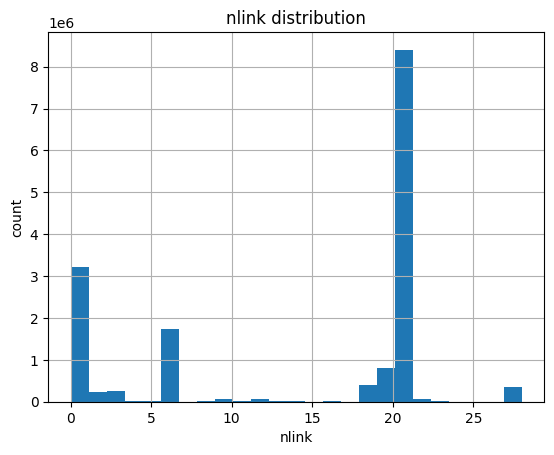

In [19]:
p = df['nlink'].hist(bins=25)
p.set_xlabel('nlink')
p.set_ylabel('count')
p.set_title('nlink distribution')

All files with `nlink` > 3 are files from `/mnt/Backup/timeshift/snapshots/` or `/mnt/Backup/backintime/`.

In [57]:
mask = (df['nlink'] > 3) & (df['parent'].str[:32] != '/mnt/Backup/timeshift/snapshots/') & (df['parent'].str[:23] != '/mnt/Backup/backintime/')
df[mask]


,path,name,stem,suffix,parent,size,mode,type,perm,uid,gid,nlink,inode,is_symlink,is_hardlink,symlink_target,created_at,modified_at,accessed_at,device
